In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Import Packages and Dataset

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint, shuffle, choice
from collections import Counter

In [3]:
df_o = pd.read_csv('Pokemon.csv').iloc[:, 1:]
df = pd.read_csv('Pokemon.csv').iloc[:, 1:]

# normalizaition
df.iloc[:, 2: -1] = df.iloc[:, 2:-1].apply(lambda x: (x-x.mean()) / x.std(), axis = 0)
df_num = df.iloc[:, 2:-1]
#df_num = df_num.apply(lambda x: (x-x.mean()) / x.std(), axis = 0)

target = list(df.iloc[120: , 1])

# Get Distance Matrix

In [4]:
def distance(r1, r2):
    return (((r1 - r2) ** 2).sum()) ** 0.5

def get_distance(M_num):
    df_dist = pd.DataFrame()

    for i in range(120, 158):
        dist = []
        for j in range(120):
            dist.append(distance(M_num.iloc[i], M_num.iloc[j]))
        df_dist['row' + str(i)] = dist 
    return df_dist

In [32]:
df_dist = get_distance(df_num)

# Get Neighbors

In [6]:
# def most_common(lst):
#    return max(set(lst), key=lst.count)

隨機抽取

In [67]:
def most_common(lst):
    c_dict = {x:lst.count(x) for x in lst}
    maxValue = max(c_dict.values())
    keys = [key for key, value in c_dict.items() if value == maxValue]
    return choice(keys)

In [68]:
def predict(df, M_dist, target, k):
    """
    df: main dataset
    M_dist: distance matrix
    target: true answers
    k: k neighbors
    """
    cols = M_dist.shape[1]
    pred = []
    for i in range(cols):
        current = M_dist.iloc[:, i:i+1]
        cur_sort = current.sort_values(by = current.columns[0])
        #print(cur_sort[:k])
        idx_list = list(cur_sort.index[:k]) # k neighbors
        type_list = []
        for idx in idx_list:
            type_list.append(df.iloc[idx, 1])
        #print(type_list)
        pred.append(most_common(type_list))
        #print(pred)
    # print(target)
    match = [pred[i] == target[i] for i in range(len(target))]
    return sum(match) / len(match)

In [88]:
predict(df, df_dist, target, 2)

0.5263157894736842

In [89]:
def graph_res(df, M_dist, target):
    klist = []
    for k in range(1, 11):
        klist.append(predict(df, M_dist, target, k))
    xaxis = [i for i in range(1, 11)]
    # print(klist)
    plt.plot(xaxis, klist, 'pink')
    plt.title("accuracy with KNN")
    # plt.savefig('knn.png')
    plt.show()
    return klist

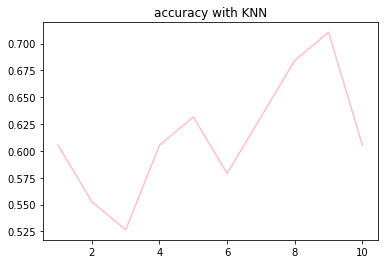

In [94]:
res = graph_res(df, df_dist, target)

# PCA

In [95]:
def eigen(train_x):
    cov_train = np.cov(train_x.T)
    eig_val, eig_vec = np.linalg.eig(cov_train)
    return eig_val, eig_vec

def PCA(train_x, n, eig_val_train, eig_vec_train):
    
    eig_pairs = [(np.abs(eig_val_train[i]), eig_vec_train[:,i]) for i in range(len(eig_val_train))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    tot = sum(eig_val_train[:n])
    var_exp = [(i / tot)*100 for i in sorted(eig_val_train[:n], reverse=True)]

    cum_var_exp = np.array(np.cumsum(var_exp), dtype = 'float32')

    pca_w = np.array([eig_pairs[i][1] for i in range(n)], dtype = 'float32')
    return train_x @ pca_w.T

將原本數值變數的矩陣套用PCA  
接著取距離

In [96]:
def get_PCA_M_dist(df_num, n):
    """
    n: n principal components
    """
    df_num_np = np.asarray(df_num)

    eig_val_dfx, eig_vec_dfx = eigen(df_num_np)
    pca_M = PCA(df_num_np, n, eig_val_dfx, eig_vec_dfx)

    pca_M = pd.DataFrame(pca_M)
    pca_M_dist = get_distance(pca_M)
    return pca_M_dist

In [97]:
pca7_train = get_PCA_M_dist(df_num, 6)

1 principal component(s)


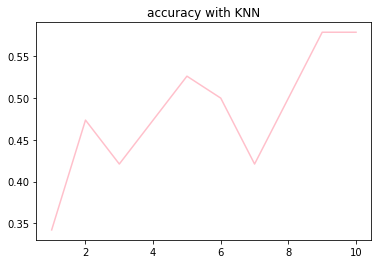

[0.34210526315789475,
 0.47368421052631576,
 0.42105263157894735,
 0.47368421052631576,
 0.5263157894736842,
 0.5,
 0.42105263157894735,
 0.5,
 0.5789473684210527,
 0.5789473684210527]

2 principal component(s)


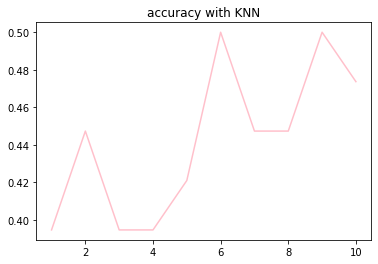

[0.39473684210526316,
 0.4473684210526316,
 0.39473684210526316,
 0.39473684210526316,
 0.42105263157894735,
 0.5,
 0.4473684210526316,
 0.4473684210526316,
 0.5,
 0.47368421052631576]

3 principal component(s)


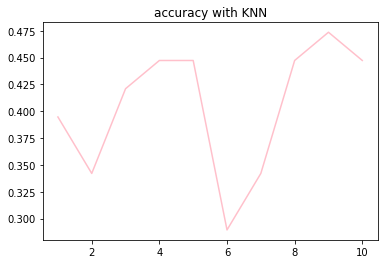

[0.39473684210526316,
 0.34210526315789475,
 0.42105263157894735,
 0.4473684210526316,
 0.4473684210526316,
 0.2894736842105263,
 0.34210526315789475,
 0.4473684210526316,
 0.47368421052631576,
 0.4473684210526316]

4 principal component(s)


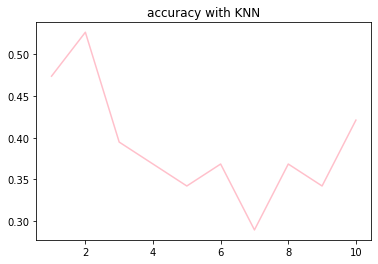

[0.47368421052631576,
 0.5263157894736842,
 0.39473684210526316,
 0.3684210526315789,
 0.34210526315789475,
 0.3684210526315789,
 0.2894736842105263,
 0.3684210526315789,
 0.34210526315789475,
 0.42105263157894735]

5 principal component(s)


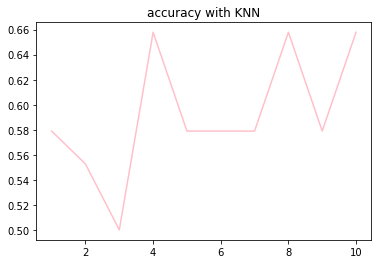

[0.5789473684210527,
 0.5526315789473685,
 0.5,
 0.6578947368421053,
 0.5789473684210527,
 0.5789473684210527,
 0.5789473684210527,
 0.6578947368421053,
 0.5789473684210527,
 0.6578947368421053]

6 principal component(s)


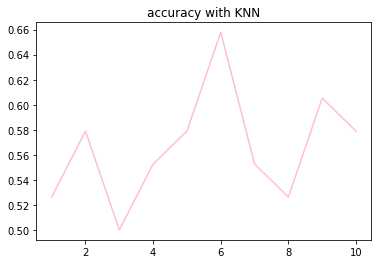

[0.5263157894736842,
 0.5789473684210527,
 0.5,
 0.5526315789473685,
 0.5789473684210527,
 0.6578947368421053,
 0.5526315789473685,
 0.5263157894736842,
 0.6052631578947368,
 0.5789473684210527]

7 principal component(s)


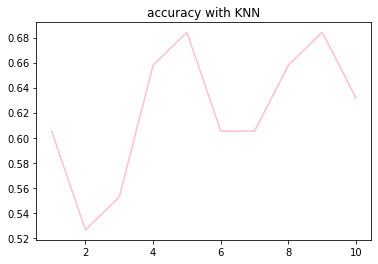

[0.6052631578947368,
 0.5263157894736842,
 0.5526315789473685,
 0.6578947368421053,
 0.6842105263157895,
 0.6052631578947368,
 0.6052631578947368,
 0.6578947368421053,
 0.6842105263157895,
 0.631578947368421]

8 principal component(s)


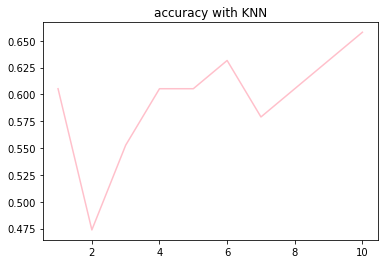

[0.6052631578947368,
 0.47368421052631576,
 0.5526315789473685,
 0.6052631578947368,
 0.6052631578947368,
 0.631578947368421,
 0.5789473684210527,
 0.6052631578947368,
 0.631578947368421,
 0.6578947368421053]

In [99]:
for i in range(1, 9):
    print(f'{i} principal component(s)')
    graph_res(df, get_PCA_M_dist(df_num, i), target)